## Setup Environment

In [2]:
!pip install pydicom pandas numpy matplotlib scikit-image pylibjpeg pylibjpeg-openjpeg

Use the following directory structure to follow along more easily.
All data will live inside the tmp directory.
The initial_data directory will hold the .tcia files used to download the DICOMs.
Each group of img data will live inside it's corresponding group data, test, train, validation.

tmp
├── initial_data
├── test
│   ├── imgs
│   └── manifest-1617905855234
├── train
│   ├── imgs
│   └── manifest-1617905855234
└── validation
    ├── imgs
    └── manifest-1617905855234

In [3]:
import os
import sys

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
set_type = 'train'
boxes_file_path = f"../tmp/{set_type}/BCS-DBT-boxes-{set_type}-v2.csv"
labels_file_path = f"../tmp/{set_type}/BCS-DBT-labels-{set_type}-v2.csv"
data_set_file_path = f"../tmp/{set_type}/BCS-DBT-file-paths-{set_type}-v2 copy.csv"

sys.path.append(parent_dir)

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

from src.dcm_reader import view_image
df = pd.read_csv(data_set_file_path)

## View Dicoms

Loading file: /Users/future/Documents/Work/_Main/.Projects/ML_DBT_Classifier/src/../tmp/train/manifest-1617905855234/Breast-Cancer-Screening-DBT/DBT-P00003/01-01-2000-DBT-S01306-MAMMO screening digital bilateral-33603/18377.000000-NA-92351/1-1.dcm


/opt/anaconda3/lib/python3.11/site-packages/openjpeg/utils.py:314: UserWarning: The (0028,0101) Bits Stored value '10' in the dataset does not match the component precision value '16' found in the JPEG 2000 data. It's recommended that you change the Bits Stored value to produce the correct output
  warnings.warn(


PatientId: DBT-P00003
View: lcc


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

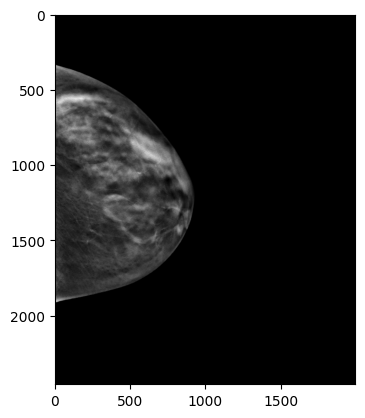

In [12]:
view_image(set_type, df, plt, 0)

Loading file: /Users/future/Documents/Work/_Main/.Projects/ML_DBT_Classifier/src/../tmp/train/manifest-1617905855234/Breast-Cancer-Screening-DBT/DBT-P00003/01-01-2000-DBT-S01306-MAMMO screening digital bilateral-33603/18384.000000-NA-64500/1-1.dcm
PatientId: DBT-P00003
View: lmlo


array([[[57087, 58495, 58495, ...,     0,     0,     0],
        [57215, 55551, 51199, ...,     0,     0,     0],
        [54911, 55295, 52735, ...,     0,     0,     0],
        ...,
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0]],

       [[61439, 58879, 53631, ...,     0,     0,     0],
        [55167, 55167, 54271, ...,     0,     0,     0],
        [56703, 57215, 58111, ...,     0,     0,     0],
        ...,
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0]],

       [[55807, 54655, 52735, ...,     0,     0,     0],
        [56703, 56703, 57855, ...,     0,     0,     0],
        [56063, 56319, 58111, ...,     0,     0,     0],
        ...,
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,    

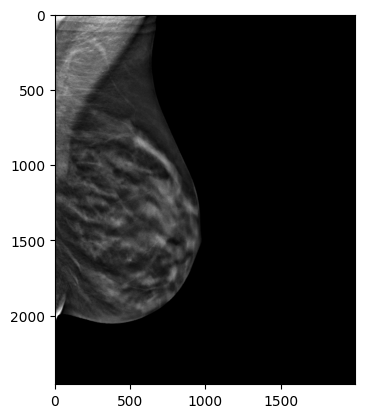

In [13]:
view_image(set_type, df, plt, 1)

In [ ]:
view_image(set_type, df, plt, 2)

In [ ]:
view_image(set_type, df, plt, 3)

## Cleanup 

## Data
Our data isn't consistent. Let's get a feel for

In [11]:
patient_counts = df['PatientID'].value_counts()
occurrence_counts = patient_counts.value_counts().sort_index()
summary_df = pd.DataFrame({
    '# Images': occurrence_counts.index,
    '# Patients': occurrence_counts.values
})

print(summary_df.to_string(index=False))


 # Images  # Patients
        1          11
        2          84
        3           3
        4        4264


In [9]:
df_labels = pd.read_csv(labels_file_path)

grouped = df_labels.groupby('PatientID').agg({
    'Normal': 'sum',
    'Actionable': 'max',
    'Benign': 'max',
    'Cancer': 'max'
}).reset_index()

normal_count = grouped[(grouped['Actionable'] == 0) & (grouped['Benign'] == 0) & (grouped['Cancer'] == 0)]['PatientID'].count()
actionable_count = grouped[grouped['Actionable'] == 1]['PatientID'].count()
benign_count = grouped[grouped['Benign'] == 1]['PatientID'].count()
cancer_count = grouped[grouped['Cancer'] == 1]['PatientID'].count()

total_patients = len(grouped)
normal_percentage = round((normal_count / total_patients) * 100,2)
benign_percentage = round((benign_count / total_patients) * 100,2)
cancer_percentage = round((cancer_count / total_patients) * 100,2)
actionable_percentage = round((actionable_count / total_patients) * 100,2)

summary_df = pd.DataFrame({
    'Category': ['Normal', 'Actionable', 'Benign', 'Cancer'],
    '# Patients': [normal_count, actionable_count, benign_count, cancer_count],
    'Percentage': [normal_percentage, actionable_percentage, benign_percentage, cancer_percentage]
})

print(summary_df)

     Category  # Patients  Percentage
0      Normal        4083       93.60
1  Actionable         178        4.08
2      Benign          62        1.42
3      Cancer          39        0.89


## Generate PNGs

In [26]:
grouped = df_labels.groupby('PatientID').agg({
    'Normal': 'sum',
    'Actionable': 'max',
    'Benign': 'max',
    'Cancer': 'max'
}).reset_index()

actionable_patients = grouped[grouped['Actionable'] == 1]['PatientID'].tolist()
benign_patients = grouped[grouped['Benign'] == 1]['PatientID'].tolist()
cancer_patients = grouped[grouped['Cancer'] == 1]['PatientID'].tolist()

print("\nActionable PatientIDs:")
print(actionable_patients)

print("\nBenign PatientIDs:")
print(benign_patients)

print("\nCancer PatientIDs:")
print(cancer_patients)


Actionable PatientIDs:
['DBT-P00023', 'DBT-P00161', 'DBT-P00183', 'DBT-P00259', 'DBT-P00270', 'DBT-P00304', 'DBT-P00310', 'DBT-P00315', 'DBT-P00395', 'DBT-P00411', 'DBT-P00488', 'DBT-P00491', 'DBT-P00499', 'DBT-P00642', 'DBT-P00644', 'DBT-P00661', 'DBT-P00688', 'DBT-P00710', 'DBT-P00754', 'DBT-P00785', 'DBT-P00822', 'DBT-P00833', 'DBT-P00851', 'DBT-P00858', 'DBT-P00869', 'DBT-P00890', 'DBT-P00892', 'DBT-P00910', 'DBT-P00933', 'DBT-P00942', 'DBT-P00946', 'DBT-P00986', 'DBT-P00988', 'DBT-P00992', 'DBT-P01021', 'DBT-P01027', 'DBT-P01042', 'DBT-P01054', 'DBT-P01106', 'DBT-P01157', 'DBT-P01194', 'DBT-P01202', 'DBT-P01211', 'DBT-P01238', 'DBT-P01319', 'DBT-P01388', 'DBT-P01411', 'DBT-P01434', 'DBT-P01447', 'DBT-P01476', 'DBT-P01485', 'DBT-P01491', 'DBT-P01517', 'DBT-P01553', 'DBT-P01668', 'DBT-P01687', 'DBT-P01761', 'DBT-P01796', 'DBT-P01822', 'DBT-P01868', 'DBT-P01940', 'DBT-P01973', 'DBT-P01978', 'DBT-P01999', 'DBT-P02118', 'DBT-P02136', 'DBT-P02143', 'DBT-P02161', 'DBT-P02178', 'DBT-P021